In [10]:
import torch
import torch.nn as nn
from datasets import load_dataset, load_from_disk
from src.models.blm.finetune.chat_format import convert_stories_to_chat_format

In [2]:
ds = load_dataset(
    "skeskinen/TinyStories-Instruct-hf",
    cache_dir="/home/pranav-pc/projects/OpenTransformer/multiformer/data/downloads",
)
ds

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 2476533
    })
    validation: Dataset({
        features: ['text'],
        num_rows: 25028
    })
})

In [3]:
ds = ds.map(lambda example: {"is_present": "Story:" in example["text"]}, num_proc=28)

In [4]:
assert sum(ds["train"]["is_present"]) == len(ds["train"])

In [5]:
ds = ds.filter(lambda example: example["is_present"], num_proc=30)
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'is_present'],
        num_rows: 2476533
    })
    validation: Dataset({
        features: ['text', 'is_present'],
        num_rows: 25026
    })
})

In [6]:
ds = ds.map(
    lambda example: {
        "text": convert_stories_to_chat_format(example["text"]).replace("\n\n\n", "")
    },
    batched=False,
    num_proc=30,
    remove_columns=ds.column_names["train"],
)

In [7]:
train, validation = ds["train"], ds["validation"]

In [13]:
ds = ds.map(lambda example: {"len": len(example["text"])})

Map:   0%|          | 0/2476533 [00:00<?, ? examples/s]

Map:   0%|          | 0/25026 [00:00<?, ? examples/s]

<Axes: ylabel='Count'>

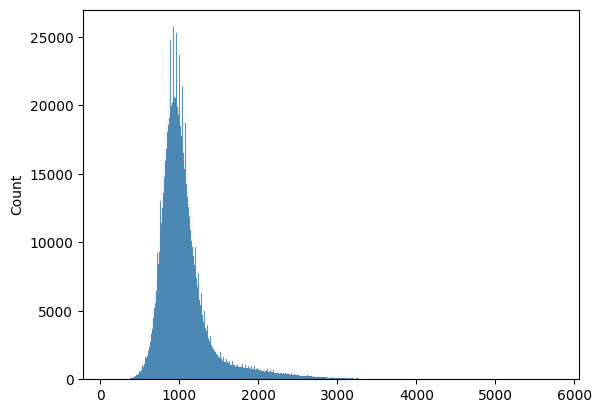

In [14]:
import seaborn as sns

sns.histplot(ds["train"]["len"])

In [26]:
sum([i < 65 for i in ds["train"]["len"]])

0

In [22]:
ds["train"][0]["text"]

'User:\nFeatures: Dialogue\nWords: quit, oak, gloomy\nSummary: Sara and Ben were playing in the park, but Sara wanted to go home because it was cold and dark. Ben convinced her to stay and play, but eventually agreed to go home and have hot cocoa.\nAssistant: \nSara and Ben were playing in the park. They liked to climb the big oak tree and pretend they were birds. They made nests with leaves and twigs and sang songs.\n\nBut today, the sky was gloomy and the wind was cold. Sara felt sad and cold. She wanted to go home and have some hot cocoa.\n\n"Ben, I want to quit," she said. "It\'s too cold and dark. Let\'s go home."\n\nBen looked at Sara and frowned. He liked the oak tree and the park. He wanted to stay and play.\n\n"No, Sara, don\'t quit," he said. "It\'s fun here. Look, there\'s a squirrel. Let\'s chase it."\n\nSara shook her head. She didn\'t want to chase the squirrel. She wanted to go home and have some hot cocoa.\n\n"Please, Ben, let\'s go home," she said. "We can play here an